## Import
Import **numpy**, **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind

## Set the CSV filenames
Set the CSV filenames for **Marinduqe** and **Palawan** dataset.

In [2]:
marinduque_hh_url = "hpq_hh_marinduque.csv"
marinduque_mem_url = "hpq_mem_marinduque.csv"
palawan_hh_url = "hpq_hh_palawan.csv"
palawan_mem_url = "hpq_mem_palawan.csv"

## Reading the Dataset

Reading the **Marinduque** dataset.

In [3]:
marinduque_mem_df = pd.read_csv(marinduque_mem_url, dtype='unicode')
marinduque_mem_df.shape

(204781, 82)

Create a new column called **province** and set it as **Marinduque**. We added this column to distinguish the dataset between the two provinces.

In [4]:
marinduque_df = marinduque_mem_df
marinduque_df["province"] = "Marinduque"
marinduque_df.head()

,main.id,memno,nucfam,reln,reln_o,sex,birth_date,age_yr,birth_reg,civstat,...,mocrim,mtheftloc,mrapeloc,minjurloc,mcarnaploc,mcattrustlloc,mocrimloc,mnutind,mnutind_date,province
0,199036,1,1,1,NaN,1,11/6/1960,53,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
1,199036,2,1,2,NaN,2,11/17/1961,52,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
2,199036,3,1,3,NaN,2,3/5/1991,23,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
3,199036,4,1,3,NaN,1,4/21/2000,14,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
4,199036,5,1,3,NaN,1,4/24/2002,12,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque


Reading the **Palawan** dataset

In [5]:
palawan_mem_df = pd.read_csv(palawan_mem_url, dtype='unicode')
palawan_mem_df.shape

(459102, 83)

Again, create a new column called **province** and set it as **Palawan**.

In [6]:
palawan_df = palawan_mem_df
palawan_df["province"] = "Palawan"
palawan_df.head()

,main.id,memno,nucfam,reln,reln_o,sex,birth_date,age,age_yr,birth_reg,...,mocrim,mtheftloc,mrapeloc,minjurloc,mcarnaploc,mcattrustlloc,mocrimloc,mnutind,mnutind_date,province
0,69279,15,1,1,NaN,1,6/16/1956,57.97399042,57,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
1,69279,16,1,2,NaN,2,8/28/1967,46.7761807,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
2,69279,17,1,3,NaN,2,11/18/1992,21.54962355,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
3,69279,18,1,3,NaN,1,4/28/1998,16.10951403,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
4,69279,19,1,3,NaN,1,10/8/2002,11.66324435,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan


## Merging the Two Dataset

In [7]:
all_df = palawan_df.append(marinduque_df, ignore_index=True)
all_df

,main.id,memno,nucfam,reln,reln_o,sex,birth_date,age,age_yr,birth_reg,...,mocrim,mtheftloc,mrapeloc,minjurloc,mcarnaploc,mcattrustlloc,mocrimloc,mnutind,mnutind_date,province
0,69279,15,1,1,NaN,1,6/16/1956,57.97399042,57,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
1,69279,16,1,2,NaN,2,8/28/1967,46.7761807,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
2,69279,17,1,3,NaN,2,11/18/1992,21.54962355,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
3,69279,18,1,3,NaN,1,4/28/1998,16.10951403,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
4,69279,19,1,3,NaN,1,10/8/2002,11.66324435,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663878,2590166,3,1,3,NaN,1,3/20/1995,NaN,20,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663879,2590166,4,1,3,NaN,1,10/24/1996,NaN,18,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663880,2590166,5,1,3,NaN,1,12/10/1999,NaN,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663881,2590166,6,1,3,NaN,1,5/16/2002,NaN,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque


### **Variables**

- **`sex`**: Sex/Gender. <br>
&emsp; 1 - Male <br>
&emsp; 2 - Female <br>
- **`age_yr`**: Age.
- **`ynotsch`**: Reason not in school. <br>
&emsp; 1 - Schools are very far <br>
&emsp; 2 - No school within the barangay <br>
&emsp; 3 - No regular transportation <br>
&emsp; 4 - High cost of education <br>
&emsp; 5 - Illness/Disability <br>
&emsp; 6 - Housekeeping/taking care of siblings <br>
&emsp; 7 - Marriage <br>
&emsp; 8 - Employment/looking for work <br>
&emsp; 9 - Lack of personal interest <br>
&emsp; 10 - Cannot cope with school work <br>
&emsp; 11 - Finished schooling <br>
&emsp; 12 - Problem with school record <br>
&emsp; 13 - Problem with birth certificate <br>
&emsp; 14 - Too young to go to school <br>
&emsp; 15 - Others
- **`educal`**: Educational Attainment. <br>
&emsp; 0 - No Grade <br>
&emsp; 1 - Day Care <br>
&emsp; 2 - Nurser/Kindergarten/Preparatory <br>
&emsp; 11 - Grade 1 <br>
&emsp; 12 - Grade 2 <br>
&emsp; 13 - Grade 3 <br>
&emsp; 14 - Grade 4 <br>
&emsp; 15 - Grade 5 <br>
&emsp; 16 - Grade 6 <br>
&emsp; 17 - Grade 7 <br>
&emsp; 18 - Grade 8 <br>
&emsp; 19 - Grade 9/3rd Year HS <br>
&emsp; 20 - Grade 10/4th Year HS <br>
&emsp; 21 - Grade 11 <br>
&emsp; 22 - Grade 12 <br>
&emsp; 23 - 1st year PS PS/N-T/TV <br>
&emsp; 24 - 2nd year PS PS/N-T/TV <br>
&emsp; 25 - 3rd year PS PS/N-T/TV <br>
&emsp; 31 - 1st year College <br>
&emsp; 32 - 2nd year College <br>
&emsp; 33 - 3rd year College <br>
&emsp; 34 - 4th year College or higher <br>
&emsp; 41 - Post grad with units <br>
&emsp; 51 - ALS Elementary <br>
&emsp; 52 - ALS Secondary <br>
&emsp; 53 - SPED Elementary <br>
&emsp; 54 - SPED Secondary <br>
&emsp; 100 - Grade school graduate <br>
&emsp; 200 - High school graduate <br>
&emsp; 210 - Post secondary graduate <br>
&emsp; 300 - College graduate <br>
&emsp; 400 - Master's/PhD graduate <br>
- **`wagcshm`**: Total Salary in the last 12 months.
- **`pwd_type`**: Disability type. <br>
&emsp; 1 - Total blindness <br>
&emsp; 2 - Partial blindness <br>
&emsp; 3 - Low vision <br>
&emsp; 4 - Totally deaf <br>
&emsp; 5 - Partially deaf <br>
&emsp; 6 - Oral defect <br>
&emsp; 7 - One hand <br>
&emsp; 8 - No hands <br>
&emsp; 9 - One leg <br>
&emsp; 10 - No legs <br>
&emsp; 11 - Mild Cerebral palsy <br>
&emsp; 12 - Severe Cerebral palsy <br>
&emsp; 13 - Retarded <br>
&emsp; 14 - Mentally ill <br>
&emsp; 15 - Mentally retardation <br>
&emsp; 16 - Multiple impairment <br>
&emsp; 17 - Others <br>

In [8]:
#all_df = all_df[["sex", "age_yr", "ynotsch", "educal", "wagcshm", "pwd_type", "province"]]
all_df

,main.id,memno,nucfam,reln,reln_o,sex,birth_date,age,age_yr,birth_reg,...,mocrim,mtheftloc,mrapeloc,minjurloc,mcarnaploc,mcattrustlloc,mocrimloc,mnutind,mnutind_date,province
0,69279,15,1,1,NaN,1,6/16/1956,57.97399042,57,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
1,69279,16,1,2,NaN,2,8/28/1967,46.7761807,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
2,69279,17,1,3,NaN,2,11/18/1992,21.54962355,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
3,69279,18,1,3,NaN,1,4/28/1998,16.10951403,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
4,69279,19,1,3,NaN,1,10/8/2002,11.66324435,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palawan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663878,2590166,3,1,3,NaN,1,3/20/1995,NaN,20,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663879,2590166,4,1,3,NaN,1,10/24/1996,NaN,18,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663880,2590166,5,1,3,NaN,1,12/10/1999,NaN,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque
663881,2590166,6,1,3,NaN,1,5/16/2002,NaN,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marinduque


## Cleaning the Dataset

### `sex` variable

In [9]:
all_df["sex"].value_counts()

1            338140
2            325742
7/23/2003         1
Name: sex, dtype: int64

In [10]:
all_df["sex"].unique()

array(['1', '2', '7/23/2003'], dtype=object)

In [11]:
all_df['sex'] = all_df['sex'].map({'1': 'male', '2': 'female'})

In [12]:
all_df["sex"].unique()

array(['male', 'female', nan], dtype=object)

Text(0.5, 1.0, '')

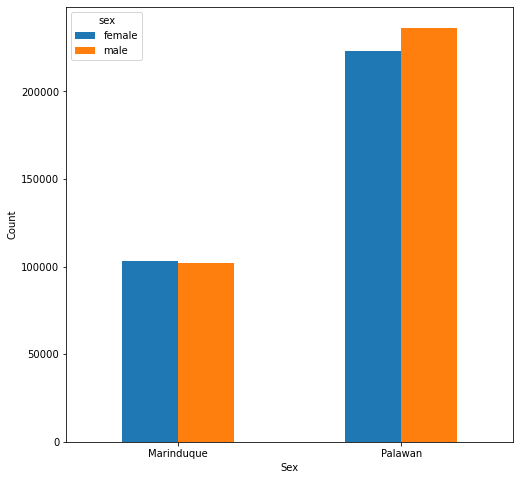

In [13]:
all_df.groupby(["province", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('')

### `age_yr` variable

In [14]:
all_df["age_yr"].isnull().any()

False

In [15]:
all_df['age_yr'].unique()

array(['57', '46', '21', '16', '11', '3', '39', '30', '12', '8', '4',
       '73', '49', '47', '38', '44', '19', '13', '10', '6', '36', '18',
       '48', '35', '33', '15', '14', '7', '1', '43', '50', '9', '52',
       '28', '31', '0', '17', '34', '22', '37', '59', '32', '29', '5',
       '67', '40', '81', '84', '74', '26', '2', '24', '71', '66', '42',
       '20', '69', '41', '51', '85', '60', '27', '56', '89', '80', '61',
       '63', '25', '78', '68', '45', '54', '62', '58', '55', '53', '23',
       '76', '86', '64', '65', '75', '70', '79', '77', '87', '82', '90',
       '72', '88', '92', '83', '94', '91', '95', '102', '98', '104', '99',
       '96', '93', '100', '119', '97', '103', '321', '925', '361', '136',
       '101', '117', '381', '346', '130', '957', '105', '319', '126',
       '129', '113', '953', '238', '125', '355', '325', '121', '148',
       '927', '369', '354', '961', '146', '108'], dtype=object)

In [16]:
all_df['age_yr'] = all_df['age_yr'].astype(int)

Text(0.5, 1.0, 'Box Plot of Age')

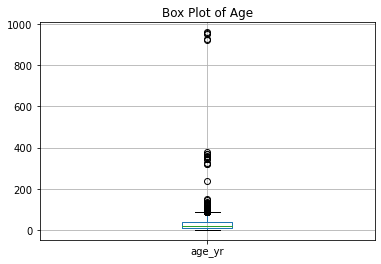

In [17]:
all_df.boxplot(column="age_yr")
plt.title("Age boxplot")

We can see in the box plot that there are outliers in the variable **age**.

In [18]:
all_df.sort_values('age_yr')['age_yr'].tail(25)

379071    125
330357    126
350052    129
243909    130
190761    136
511586    146
388241    148
378995    238
322254    319
117623    321
383780    325
361957    346
233445    346
466060    354
380757    355
382341    355
182077    361
469267    369
416659    369
226332    381
172461    925
414833    927
377107    953
256153    957
479404    961
Name: age_yr, dtype: int32

Text(0.5, 1.0, 'Box Plot of Age')

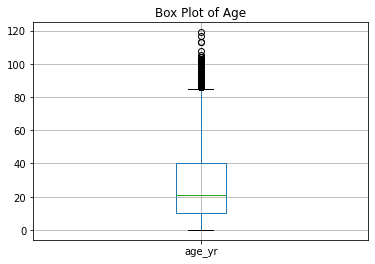

In [20]:
all_df[(all_df["age_yr"] <= 120)].boxplot(column="age_yr")
plt.title("Filtered age boxplot")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018411A46A00>]],
      dtype=object)

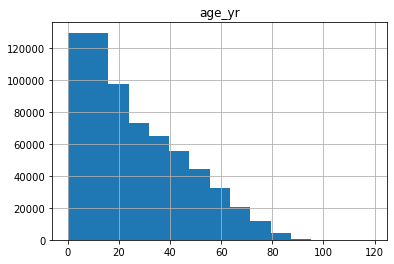

In [19]:
all_df[(all_df["age_yr"] <= 120)].hist(bins=15)

We can see that the youth or young people dominates in the population.

### `educal` variable

In [21]:
all_df["educal"].unique()

array(['14', '16', '19', '15', '2', '13', '33', '20', '0', '32', '11',
       '18', nan, '1', '17', '12', '300', '31', '24', '200', '34', '52',
       '100', '41', '210', '23', '51', '25', '400', '53', '21', '22',
       '54'], dtype=object)

In [22]:
all_df["educal"].isnull().any()

True

In [23]:
all_df.loc[all_df['educal'].isnull(),'educal'] = -1

In [24]:
all_df['educal'] = all_df['educal'].astype(int)

In [25]:
all_df["educal"].unique()

array([ 14,  16,  19,  15,   2,  13,  33,  20,   0,  32,  11,  18,  -1,
         1,  17,  12, 300,  31,  24, 200,  34,  52, 100,  41, 210,  23,
        51,  25, 400,  53,  21,  22,  54])

We now apply binning in the variable **educal** or educational attainment and create a column called **educal_range**.

- **`No Grade`**: No Grade.
- **`Day Care`**: Day Care.
- **`Pre-School`**: Pre-School.
- **`Elementary`**: Grade 1 to Grade 6.
- **`High School`**: Grade 7 to Grade 12.
- **`Post-Secondary`**: 1st yr to 3rd yr Post-Secondary.
- **`College Undergraduate`**: College 1st yr to 4th yr or higher.
- **`College Graduate`**: College Graduate.
- **`Post-Grad`**: Masters/Doctorate Degree.
- **`SPED`**: Special Education and ALS.

In [26]:
all_df["educal_range"] = all_df["educal"].map({0: 'No Grade', 
                                               1: 'Day Care',
                                               2: 'Pre-School',
                                               11: 'Elementary', 12: 'Elementary', 13: 'Elementary', 14: 'Elementary', 15: 'Elementary', 16: 'Elementary', 100: 'Elementary',
                                               17: 'High School', 18: 'High School', 19: 'High School', 20: 'High School', 21: 'High School', 22: 'High School', 200: 'High School',
                                               23: 'Post-Secondary', 24: 'Post-Secondary', 25: 'Post-Secondary', 210: 'Post-Secondary',
                                               31: 'College Undergraduate', 32: 'College Undergraduate', 33: 'College Undergraduate', 34: 'College Undergraduate',
                                               41: 'Post-Grad', 400: "Post-Grad",
                                               51: 'SPED', 52: 'SPED', 53: 'SPED', 54: 'SPED',
                                               300: 'College Graduate',
                                               -1: "Not Stated"})

Text(0.5, 1.0, '')

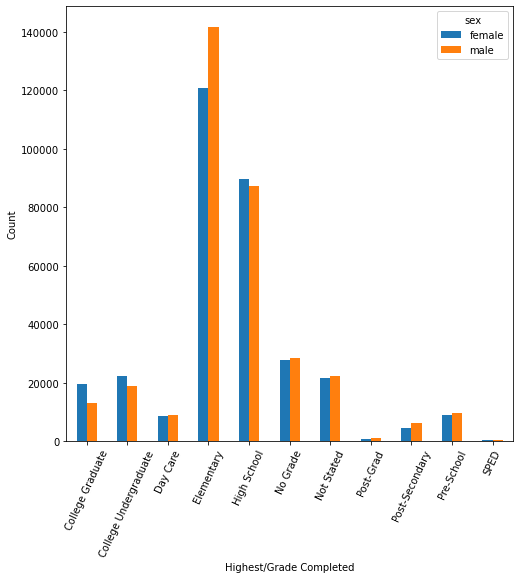

In [27]:
all_df.groupby(["educal_range", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Highest/Grade Completed')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')

In the provinces of Marinduque and Palawan, more people attended or completed elementary education. On the other hand, we can see that there are more females than males who are college graduate. There are also more females who attended or completed college and high school than males.

### `wagcshm` variable

In [ ]:
all_df["ynotsch_full"] = all_df["ynotsch"].map({1: 'Schools are very far', 2: 'No school within the brgy', 3: 'No regular transportation', 4: 'High cost of education', 5: 'Illness/Disability', 6: 'Housekeeping/taking care of siblings', 7: 'Marriage', 8: 'Employment/looking for work', 9: 'Lack of personal interest', 10: 'Cannot cope with school work', 11: 'Finished schooling', 12: 'Problem with school record', 13: 'Problem with birth certificate', 14: 'Too young to go to school', 15: 'Others'})

In [ ]:
adults_df.groupby("educal_range").agg({"wagcshm": ["mean"]}).sort_values(("educal_range")).plot(kind="bar", figsize=(8, 8))
plt.xlabel('Average salary for 12 months')
plt.ylabel('Educational Attainment')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
adults_df.groupby("sex").agg({"wagcshm": ["mean"]}).plot(kind="bar", figsize=(8, 8))
plt.ylabel('Average salary for 12 months')
plt.xlabel('Educational Attainment')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
all_df.groupby(['educal', 'sex']).size().unstack().sort_values(("educal")).plot(kind='bar', figsize=(8, 8))
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')

In [ ]:
young_people_df = all_df.query("age_yr <= 24")

In [ ]:
young_people_df["age_yr"]

In [ ]:
young_people_df["ynotsch"]

In [ ]:
#young_people_df = young_people_df.dropna(subset=['ynotsch'])

In [ ]:
young_people_df["ynotsch"].unique()

In [ ]:
#young_people_df['ynotsch'] = young_people_df['ynotsch'].astype(int)
young_people_df.groupby(["ynotsch", "sex"]).size()

In [ ]:
young_people_df[young_people_df['ynotsch_full'] != -1].groupby(['ynotsch_full', 'sex']).size().unstack().plot(kind='barh', figsize=(8, 8))
plt.xlabel('Count')
plt.ylabel('Reason for Not Going to School')
plt.title('')

In [ ]:
all_df['occup'].unique()

In [ ]:
all_df.shape

In [ ]:
all_df.reset_index().plot.scatter(x = 'index', y = 'wagcshm')
plt.axis([0,663883,0,23053296])

In [ ]:
all_df.sort_values('wagcshm')[['wagcshm', 'province', 'occup', 'indust', 'educal_full']].tail(50)

In [ ]:
all_df['age_yr'].value_counts()

In [ ]:
all_df.reset_index().plot.scatter(x = 'index', y = 'age_yr')

In [ ]:
all_df.sort_values('age_yr')['age_yr'].tail(50)

In [ ]:
all_df['age_2022'] = all_df['age_yr'] + 6 + 2

In [ ]:
all_df[all_df['age_2022'] >= 18].groupby('province').size()

Suppose that Commission on Elections wants to know how many new voters to expect in the 2022 Philippine elections.

We filter out the data whose age are greater than 16, because an elections happened in 2016 and the data was collected on 2014.

In [ ]:
new_voters = all_df[all_df['age_yr'] < 16]

In [ ]:
new_voters['age_yr']

In [ ]:
new_voters['age_2022'] = new_voters['age_yr'] + 6 + 2

In [ ]:
new_voters['age_2022']

In [ ]:
new_voters = new_voters[new_voters['age_2022'] >= 18]

In [ ]:
new_voters

In [ ]:
new_voters.groupby('province').size()

In [ ]:
all_df.groupby('mcrimeind').size()

In [ ]:
all_df.groupby(['mcrimeind', 'mtheftind', 'mrapeind', 'minjurind', 'mcarnapind', 'mcattrustlind', 'mocrimind']).size()

In [ ]:
all_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
all_df.query("educal == 300 | educal == 200").groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df = all_df.query("educal == 300 | educal == 200").sample(60)
sample_df.shape

In [ ]:
ttest_ind(sample_df[sample_df["educal"] == 300]["wagcshm"],
          sample_df[sample_df["educal"] == 200]["wagcshm"],
          equal_var = False)

In [ ]:
sample_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df.boxplot(column="wagcshm")

In [ ]:
all_df.query("educal == 200 | educal == 100").shape

In [ ]:
sample_df = all_df.query("educal == 200 | educal == 100").sample(60)
sample_df.shape

In [ ]:
ttest_ind(sample_df[sample_df["educal"] == 200]["wagcshm"],
          sample_df[sample_df["educal"] == 100]["wagcshm"],
          equal_var = False)

In [ ]:
sample_df.groupby("educal_full").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
sample_df.boxplot(column="wagcshm")

In [ ]:
all_df = adults_df.sample(60)
all_df["province"].value_counts()

In [ ]:
print(np.var(all_df[all_df["sex"] == "male"]["wagcshm"]), np.var(all_df[all_df["sex"] == "female"]["wagcshm"]))

In [ ]:
ttest_ind(all_df[all_df["province"] == "Marinduque"]["wagcshm"],
          all_df[all_df["province"] == "Palawan"]["wagcshm"],
          equal_var = False)

In [ ]:
all_df.groupby("province").agg({"wagcshm": ["mean", "median", "std", len]})

In [ ]:
all_df.groupby(['pwd_type', 'sex']).size().unstack().plot(kind='bar', figsize=(8, 8))
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')